In [1]:
import sys
sys.path.append("..")

from utilities import FileUtils

import numpy as np
import matplotlib.pyplot as plt

# FUNCTIONS

In [2]:
def plot_summary_statistics(state_dict, ignore_zeros=False):
    """Plot the mean and standard deviation of the values in the state arrays.

    Args:
        state_dict (dict): A dictionary of dictionaries of state arrays.
        ignore_zeros (bool): A flag to indicate whether to ignore zeros in the calculations.
    """
    means = []
    stds = []

    # Iterate over the state dictionaries and their arrays
    for model_id, state_arrays in state_dict.items():
        for state_number, array in state_arrays.items():
            if ignore_zeros:
                # Mask the zeros in the array
                masked_array = np.ma.masked_equal(array, 0)
                mean = np.mean(masked_array)
                std = np.std(masked_array)
            else:
                mean = np.mean(array)
                std = np.std(array)
            means.append(mean)
            stds.append(std)

    # Ensure we have data to plot
    if means and stds:
        # Plotting
        plt.figure(figsize=(10, 5))

        # Plot means
        plt.subplot(1, 2, 1)
        plt.hist(means, bins=20, color='blue', alpha=0.7)
        plt.title('Mean Values')
        plt.xlabel('Mean')
        plt.ylabel('Frequency')

        # Plot standard deviations
        plt.subplot(1, 2, 2)
        plt.hist(stds, bins=20, color='green', alpha=0.7)
        plt.title('Standard Deviation')
        plt.xlabel('Standard Deviation')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot.")

def plot_value_distribution(state_dict, ignore_zeros=True):
    """Plot the distribution of values across all state arrays.

    Args:
        state_dict (dict): A dictionary of dictionaries of state arrays.
        ignore_zeros (bool): A flag to indicate whether to ignore zeros in the calculations.
    """
    all_values = []

    # Collect values from all arrays
    for model_id, state_arrays in state_dict.items():
        for state_number, array in state_arrays.items():
            if ignore_zeros:
                # Filter out zero values
                non_zero_values = array[array != 0]
                all_values.extend(non_zero_values.flatten())
            else:
                all_values.extend(array.flatten())

    # Ensure we have data to plot
    if all_values:
        plt.figure(figsize=(8, 6))
        plt.hist(all_values, bins=50, color='purple', alpha=0.7)
        plt.title('Value Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print("No data available to plot.")

def plot_outliers(state_dict, ignore_zeros=True):
    """Plot a boxplot to visualize outliers in the values across all state arrays.

    Args:
        state_dict (dict): A dictionary of dictionaries of state arrays.
        ignore_zeros (bool): A flag to indicate whether to ignore zeros in the calculations.
    """
    all_values = []

    # Collect values from all arrays
    for model_id, state_arrays in state_dict.items():
        for state_number, array in state_arrays.items():
            if ignore_zeros:
                # Filter out zero values
                non_zero_values = array[array != 0]
                all_values.extend(non_zero_values.flatten())
            else:
                all_values.extend(array.flatten())

    # Ensure we have data to plot
    if all_values:
        plt.figure(figsize=(10, 6))
        plt.boxplot(all_values, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=5))
        plt.title('Outlier Detection')
        plt.xlabel('Value')
        plt.grid(True)
        plt.show()
    else:
        print("No data available to plot.")

def calculate_and_plot_iqr(state_dict, ignore_zeros=True):
    """Calculate the interquartile range (IQR) and plot a histogram with the IQR highlighted.

    Args:
        state_dict (dict): A dictionary of dictionaries of state arrays.
        ignore_zeros (bool): Whether to ignore zeros in the calculations.

    Returns:
        float: The computed IQR of the combined data.
    """
    all_values = []

    # Collect values from all arrays
    for model_id, state_arrays in state_dict.items():
        for state_number, array in state_arrays.items():
            if ignore_zeros:
                # Filter out zero values
                non_zero_values = array[array != 0]
                all_values.extend(non_zero_values.flatten())
            else:
                all_values.extend(array.flatten())

    # Calculate IQR
    q1 = np.percentile(all_values, 25)
    q3 = np.percentile(all_values, 75)
    iqr = q3 - q1

    # Plot histogram and IQR
    if all_values:
        plt.figure(figsize=(10, 6))
        _, bins, _ = plt.hist(all_values, bins=50, color='skyblue', alpha=0.7, label='Data Distribution')
        plt.axvspan(q1, q3, color='orange', alpha=0.3, label=f'IQR: {iqr:.2f}')
        plt.title('Data Distribution with IQR Highlighted')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No data available to plot.")

    return iqr


def identify_extreme_outliers(state_dict, multiplier=3.0, ignore_zeros=False):
    """Identify and plot extreme outliers using a custom multiplier for the IQR, with labeled bounds.

    Args:
        state_dict (dict): A dictionary of dictionaries of state arrays.
        multiplier (float): The multiplier used to define what is considered an extreme outlier.
        ignore_zeros (bool): Whether to ignore zeros in the calculations.

    Returns:
        list: A list of extreme outlier values.
    """
    all_values = []

    # Collect values from all arrays
    for model_id, state_arrays in state_dict.items():
        for state_number, array in state_arrays.items():
            if ignore_zeros:
                # Filter out zero values
                non_zero_values = array[array != 0]
                all_values.extend(non_zero_values.flatten())
            else:
                all_values.extend(array.flatten())

    # Calculate IQR and define outliers
    q1 = np.percentile(all_values, 25)
    q3 = np.percentile(all_values, 75)
    iqr = q3 - q1
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)

    # Identify extreme outliers
    extreme_outliers = [value for value in all_values if value < lower_bound or value > upper_bound]

    # Plot histogram and outliers
    if all_values:
        plt.figure(figsize=(10, 6))
        _, bins, _ = plt.hist(all_values, bins=50, color='skyblue', alpha=0.7, label='Data Distribution')
        plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2)
        plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
        plt.text(lower_bound, plt.ylim()[1] * 0.95, f'Lower: {lower_bound:.2f}', color='red', ha='right')
        plt.text(upper_bound, plt.ylim()[1] * 0.95, f'Upper: {upper_bound:.2f}', color='red', ha='left')
        plt.title('Data Distribution with Extreme Outlier Bounds')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No data available to plot.")

    return extreme_outliers

def plot_outlier_bounds_and_report_percentage(state_dict, lower_bound, upper_bound, ignore_zeros=False):
    """Plot specified upper and lower bounds on a histogram and report the percentage of outliers,
    with an option to ignore zeros.

    Args:
        state_dict (dict): A dictionary of dictionaries containing state arrays.
        lower_bound (float): The specified lower bound for outlier detection.
        upper_bound (float): The specified upper bound for outlier detection.
        ignore_zeros (bool): Whether to ignore zeros in the calculations.

    """
    all_values = []

    # Collect all values from the state arrays
    for model_id, state_arrays in state_dict.items():
        for state_number, array in state_arrays.items():
            values = array.flatten()
            if ignore_zeros:
                values = values[values != 0]
            all_values.extend(values)

    # Calculate the percentage of outliers
    total_values = len(all_values)
    outliers = [value for value in all_values if value < lower_bound or value > upper_bound]
    outlier_percentage = (len(outliers) / total_values) * 100 if total_values > 0 else 0

    # Plot histogram and bounds
    plt.figure(figsize=(10, 6))
    _, bins, _ = plt.hist(all_values, bins=50, color='skyblue', alpha=0.7, label='Data Distribution')
    plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2,
                label=f'Lower Bound: {lower_bound}')
    plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2,
                label=f'Upper Bound: {upper_bound}')
    plt.title('Data Distribution with Specified Outlier Bounds')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Report the percentage of values treated as outliers
    print(f"Percentage of values treated as outliers: {outlier_percentage:.2f}% (ignoring zeros: {ignore_zeros})")

In [3]:
processed_results_dir = r'/home/tom/repos/dyna-landslide-surrogate/data/processed'

model_id = '0001'



In [4]:
vel = FileUtils.load_state_arrays(processed_results_dir, model_id, 'velocity')

In [5]:
vel.keys()

odict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122])

In [6]:
vels = FileUtils.load_all_models_state_arrays(processed_results_dir, 'velocity')

In [7]:
vels.keys()

odict_keys(['0001', '0002', '0003', '0004', '0005', '0006', '0007'])

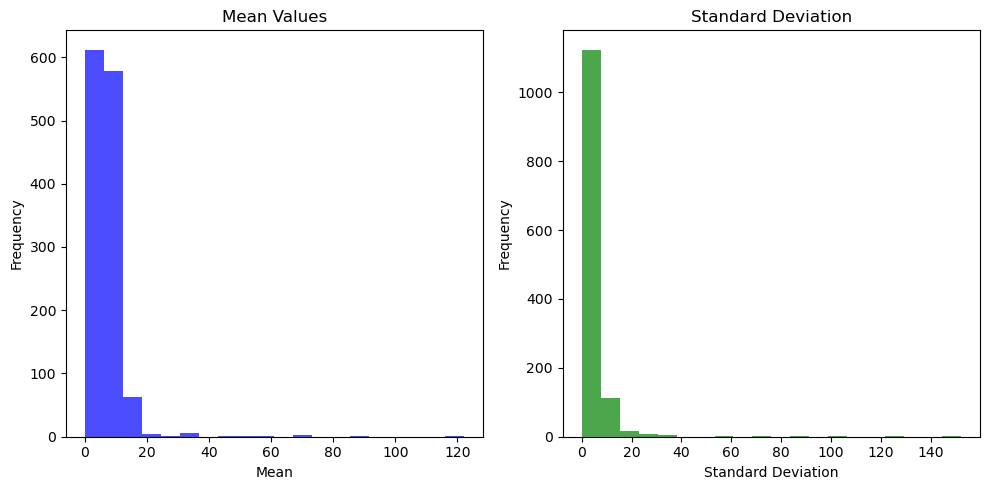

In [8]:
plot_summary_statistics(state_dict=vels, ignore_zeros=True)

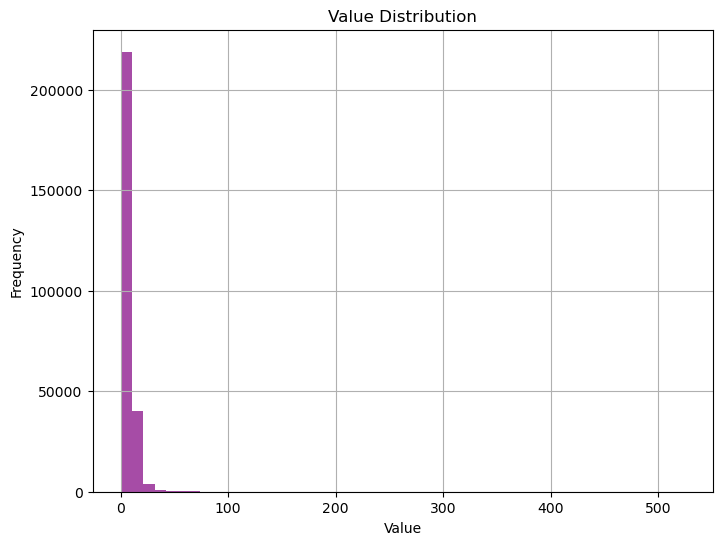

In [9]:
plot_value_distribution(state_dict=vels, ignore_zeros=True)

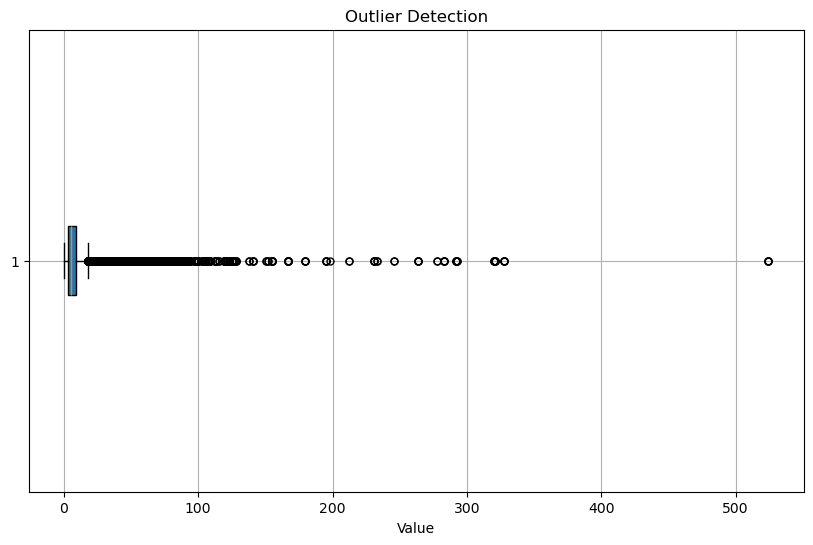

In [10]:
plot_outliers(state_dict=vels, ignore_zeros=True)

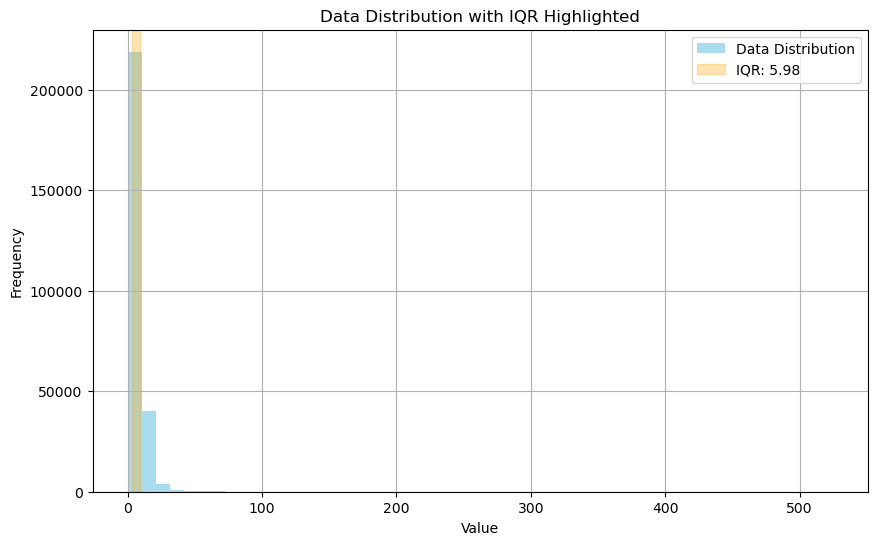

5.979999999999999

In [11]:
calculate_and_plot_iqr(vels, ignore_zeros=True)

"if the standard outlier detection is flagging values that are legitimate for your specific case study, you can modify the criteria for identifying outliers. This can be done by adjusting the multiplier used in the calculation of the whiskers in a boxplot, which is typically set at 1.5 times the IQR for mild outliers and 3 times the IQR for extreme outliers. By using a larger multiplier, you can identify only the more extreme outliers."

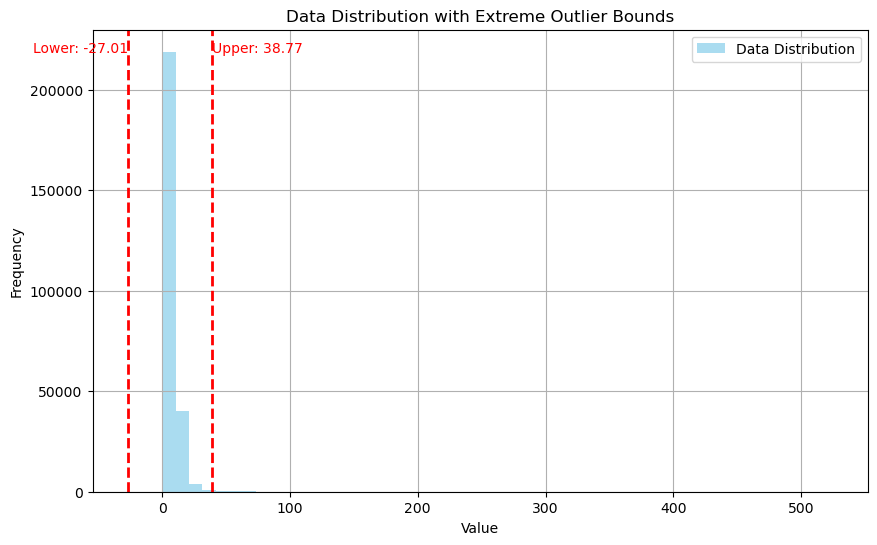

[71.2,
 320.32,
 320.32,
 97.94,
 198.13,
 320.32,
 320.32,
 97.94,
 263.44,
 263.44,
 263.44,
 263.44,
 61.88,
 61.88,
 52.9,
 76.45,
 76.45,
 61.88,
 52.9,
 76.45,
 76.45,
 74.49,
 74.49,
 46.03,
 112.41,
 112.41,
 74.49,
 46.03,
 112.41,
 112.41,
 58.55,
 58.55,
 44.74,
 49.78,
 58.55,
 58.55,
 44.74,
 55.7,
 55.7,
 55.7,
 55.7,
 41.96,
 41.96,
 41.96,
 41.96,
 70.75,
 70.75,
 70.64,
 70.75,
 70.75,
 70.64,
 39.12,
 39.12,
 39.12,
 39.12,
 89.13,
 89.13,
 113.08,
 113.08,
 113.08,
 113.08,
 39.3,
 57.59,
 57.59,
 39.3,
 57.59,
 57.59,
 48.68,
 62.17,
 62.17,
 48.68,
 62.17,
 62.17,
 39.51,
 39.51,
 42.01,
 42.01,
 81.76,
 81.76,
 52.64,
 52.64,
 81.76,
 81.76,
 52.64,
 52.64,
 48.67,
 82.36,
 82.36,
 51.55,
 48.67,
 82.36,
 82.36,
 51.55,
 46.96,
 46.96,
 46.96,
 46.96,
 44.25,
 46.54,
 46.54,
 44.25,
 46.54,
 46.54,
 55.79,
 55.79,
 55.79,
 55.79,
 43.07,
 43.07,
 43.07,
 43.07,
 97.53,
 179.18,
 179.18,
 97.53,
 179.18,
 179.18,
 61.3,
 89.95,
 89.95,
 61.3,
 89.95,
 89.95,
 88.56

In [12]:
identify_extreme_outliers(vels, multiplier=5.0, ignore_zeros=True)

max velocities are in the order of ~20m/s in GEO Report No. 174

https://www.cedd.gov.hk/filemanager/eng/content_329/er174links.pdf 

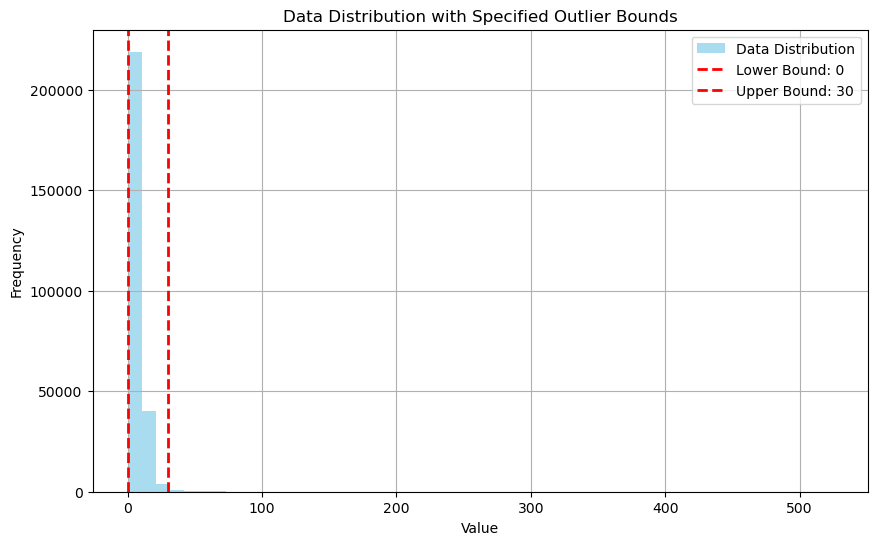

Percentage of values treated as outliers: 0.94% (ignoring zeros: True)


In [14]:
plot_outlier_bounds_and_report_percentage(state_dict=vels, lower_bound=0, upper_bound=30, ignore_zeros=True)